In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [97]:
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

Hello_world
Hello_world.py
Sber.ipynb
Sberbank.py
macro.csv
sample_submission.csv
test.csv
train.csv



In [98]:
df = pd.read_csv("train.csv")
print(df.columns)

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


In [ ]:
#Group by data type
df.columns.to_series().groupby(df.dtypes).groups

In [ ]:
#List column titles
list(df.select_dtypes(include=['int64']).columns)

In [ ]:
round(df.select_dtypes(include=['int64']).describe(),2)

In [ ]:
print(df['num_room'].describe())

In [ ]:
#Number of rows with missing values in the whole set
print(df.shape[0] - df.dropna().shape[0])

In [99]:
#Missing values
x = df.isnull().sum()
x_ascend = x.sort_values(ascending = [False])
x_asc_df = pd.DataFrame(x_ascend)

In [100]:
#Number of variables with missing values.
np.count_nonzero(x_asc_df)

51

51 variables from 292 contain missing records

Which of them stand out? I slice the first 53 rows to see where the number of missing values goes to zero

In [101]:
x_asc_df[0:53]

,0
hospital_beds_raion,14441
build_year,13605
state,13559
cafe_avg_price_500,13281
cafe_sum_500_max_price_avg,13281
cafe_sum_500_min_price_avg,13281
max_floor,9572
material,9572
num_room,9572
kitch_sq,9572


Nice. Some realy important variables such as the distance to a metro station
have a small number of missing values. We can drop the missing rows with no remorse after a quick check.
Unfortunately, records for some important variables like build_year are missing in large.

I will create a subset of the train data set, containing only 51 variables with missing records.

In [102]:
nuli = x_asc_df[0:51].transpose()

In [103]:
list_of_nulls = list(nuli.columns.values)

In [104]:
list_of_nulls

['hospital_beds_raion',
 'build_year',
 'state',
 'cafe_avg_price_500',
 'cafe_sum_500_max_price_avg',
 'cafe_sum_500_min_price_avg',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'life_sq',
 'build_count_frame',
 'build_count_1971-1995',
 'build_count_block',
 'raion_build_count_with_material_info',
 'build_count_after_1995',
 'build_count_brick',
 'build_count_wood',
 'build_count_mix',
 'build_count_1921-1945',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'raion_build_count_with_builddate_info',
 'build_count_monolith',
 'build_count_before_1920',
 'build_count_1946-1970',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_avg_price_3000',
 'cafe_sum_3000_max_price_avg',
 'cafe_sum_3000_min_price_avg',


In [105]:
df_null = pd.DataFrame(df[list_of_nulls])

In [106]:
df_null

,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,kitch_sq,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,947.14,1185.71,708.57,13.31,4.0,13.575119,5.419893,65.038716,1.0,1.131260
1,229.0,NaN,NaN,1180.00,1500.00,860.00,NaN,NaN,NaN,NaN,...,911.31,1148.81,673.81,27.47,3.0,7.620630,3.411993,40.943917,2.0,0.635053
2,1183.0,NaN,NaN,916.67,1166.67,666.67,NaN,NaN,NaN,NaN,...,949.55,1196.43,702.68,21.58,2.0,17.351515,1.277658,15.331896,3.0,1.445960
3,NaN,NaN,NaN,1250.00,1500.00,1000.00,NaN,NaN,NaN,NaN,...,1242.11,1552.63,931.58,3.89,9.0,11.565624,4.291432,51.497190,4.0,0.963802
4,562.0,NaN,NaN,934.44,1166.67,702.22,NaN,NaN,NaN,NaN,...,1132.66,1411.45,853.88,10.92,4.0,8.266305,0.853960,10.247521,5.0,0.688859
5,NaN,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,NaN,...,1025.00,1280.08,769.92,25.79,14.0,18.378170,0.375312,4.503740,6.0,1.531514
6,4849.0,NaN,NaN,1000.00,1250.00,750.00,NaN,NaN,NaN,NaN,...,1031.11,1291.18,771.05,12.76,10.0,12.322993,2.603671,31.244046,7.0,1.026916
7,240.0,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,NaN,...,949.24,1189.39,709.09,11.44,5.0,11.527788,4.309575,51.714896,8.0,0.960649
8,1894.0,NaN,NaN,858.33,1083.33,633.33,NaN,NaN,NaN,NaN,...,948.48,1185.61,711.36,14.52,5.0,14.742289,1.540958,18.491502,9.0,1.228524
9,2620.0,NaN,NaN,575.00,750.00,400.00,NaN,NaN,NaN,NaN,...,1226.36,1531.01,921.71,10.50,9.0,4.755297,2.522422,30.269060,10.0,0.396275


We need to find dependencies between our target variable - price_doc and those with missing records. 
I will add the price_doc column into the df_null frame.

In [107]:
price = pd.DataFrame(df['price_doc'])

In [123]:
price_null = pd.concat([price,df_null], axis = 1)
price_null

,price_doc,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
0,5850000,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,947.14,1185.71,708.57,13.31,4.0,13.575119,5.419893,65.038716,1.0,1.131260
1,6000000,229.0,NaN,NaN,1180.00,1500.00,860.00,NaN,NaN,NaN,...,911.31,1148.81,673.81,27.47,3.0,7.620630,3.411993,40.943917,2.0,0.635053
2,5700000,1183.0,NaN,NaN,916.67,1166.67,666.67,NaN,NaN,NaN,...,949.55,1196.43,702.68,21.58,2.0,17.351515,1.277658,15.331896,3.0,1.445960
3,13100000,NaN,NaN,NaN,1250.00,1500.00,1000.00,NaN,NaN,NaN,...,1242.11,1552.63,931.58,3.89,9.0,11.565624,4.291432,51.497190,4.0,0.963802
4,16331452,562.0,NaN,NaN,934.44,1166.67,702.22,NaN,NaN,NaN,...,1132.66,1411.45,853.88,10.92,4.0,8.266305,0.853960,10.247521,5.0,0.688859
5,9100000,NaN,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,...,1025.00,1280.08,769.92,25.79,14.0,18.378170,0.375312,4.503740,6.0,1.531514
6,5500000,4849.0,NaN,NaN,1000.00,1250.00,750.00,NaN,NaN,NaN,...,1031.11,1291.18,771.05,12.76,10.0,12.322993,2.603671,31.244046,7.0,1.026916
7,2000000,240.0,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,...,949.24,1189.39,709.09,11.44,5.0,11.527788,4.309575,51.714896,8.0,0.960649
8,5300000,1894.0,NaN,NaN,858.33,1083.33,633.33,NaN,NaN,NaN,...,948.48,1185.61,711.36,14.52,5.0,14.742289,1.540958,18.491502,9.0,1.228524
9,2000000,2620.0,NaN,NaN,575.00,750.00,400.00,NaN,NaN,NaN,...,1226.36,1531.01,921.71,10.50,9.0,4.755297,2.522422,30.269060,10.0,0.396275


In [126]:
price_null

,price_doc,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
0,5850000,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,947.14,1185.71,708.57,13.31,4.0,13.575119,5.419893,65.038716,1.0,1.131260
1,6000000,229.0,NaN,NaN,1180.00,1500.00,860.00,NaN,NaN,NaN,...,911.31,1148.81,673.81,27.47,3.0,7.620630,3.411993,40.943917,2.0,0.635053
2,5700000,1183.0,NaN,NaN,916.67,1166.67,666.67,NaN,NaN,NaN,...,949.55,1196.43,702.68,21.58,2.0,17.351515,1.277658,15.331896,3.0,1.445960
3,13100000,NaN,NaN,NaN,1250.00,1500.00,1000.00,NaN,NaN,NaN,...,1242.11,1552.63,931.58,3.89,9.0,11.565624,4.291432,51.497190,4.0,0.963802
4,16331452,562.0,NaN,NaN,934.44,1166.67,702.22,NaN,NaN,NaN,...,1132.66,1411.45,853.88,10.92,4.0,8.266305,0.853960,10.247521,5.0,0.688859
5,9100000,NaN,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,...,1025.00,1280.08,769.92,25.79,14.0,18.378170,0.375312,4.503740,6.0,1.531514
6,5500000,4849.0,NaN,NaN,1000.00,1250.00,750.00,NaN,NaN,NaN,...,1031.11,1291.18,771.05,12.76,10.0,12.322993,2.603671,31.244046,7.0,1.026916
7,2000000,240.0,NaN,NaN,1312.50,1625.00,1000.00,NaN,NaN,NaN,...,949.24,1189.39,709.09,11.44,5.0,11.527788,4.309575,51.714896,8.0,0.960649
8,5300000,1894.0,NaN,NaN,858.33,1083.33,633.33,NaN,NaN,NaN,...,948.48,1185.61,711.36,14.52,5.0,14.742289,1.540958,18.491502,9.0,1.228524
9,2000000,2620.0,NaN,NaN,575.00,750.00,400.00,NaN,NaN,NaN,...,1226.36,1531.01,921.71,10.50,9.0,4.755297,2.522422,30.269060,10.0,0.396275


In [128]:
corrmat2 = price_null.corr()

In [129]:
corrmat2

,price_doc,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
price_doc,1.000000,0.147137,0.002161,0.121303,0.037438,0.037907,0.036430,0.094386,0.064047,0.476337,...,0.032920,0.033343,0.032183,0.087792,0.117447,-0.182786,-0.132263,-0.132263,-0.021835,-0.182786
hospital_beds_raion,0.147137,1.000000,-0.008986,0.118848,0.038279,0.039043,0.036833,-0.153328,0.086775,0.048452,...,0.192749,0.190479,0.195827,0.127475,-0.101810,-0.233465,-0.011757,-0.011757,-0.137110,-0.233465
build_year,0.002161,-0.008986,1.000000,0.295053,0.001464,0.001425,0.001512,-0.000261,-0.004402,-0.008251,...,0.000312,0.000301,0.000330,-0.001478,0.001192,-0.003774,0.002765,0.002765,0.001177,-0.003774
state,0.121303,0.118848,0.295053,1.000000,-0.109916,-0.115488,-0.100468,-0.072161,-0.034225,0.082027,...,-0.223971,-0.224991,-0.221881,0.176533,-0.113906,-0.167096,-0.219587,-0.219587,-0.057323,-0.167096
cafe_avg_price_500,0.037438,0.038279,0.001464,-0.109916,1.000000,0.998057,0.995364,0.117790,-0.019548,-0.006268,...,0.151215,0.153620,0.147253,-0.125796,0.034977,0.000398,0.058935,0.058935,0.017930,0.000398
cafe_sum_500_max_price_avg,0.037907,0.039043,0.001425,-0.115488,0.998057,1.000000,0.987438,0.120368,-0.017790,-0.007040,...,0.148620,0.151159,0.144453,-0.120818,0.037884,-0.009328,0.049262,0.049262,0.011339,-0.009328
cafe_sum_500_min_price_avg,0.036430,0.036833,0.001512,-0.100468,0.995364,0.987438,1.000000,0.112931,-0.022130,-0.005025,...,0.154065,0.156245,0.150452,-0.132526,0.030223,0.015410,0.073416,0.073416,0.027967,0.015410
max_floor,0.094386,-0.153328,-0.000261,-0.072161,0.117790,0.120368,0.112931,1.000000,0.045915,-0.014220,...,-0.031994,-0.026788,-0.039969,-0.082046,0.454488,-0.111017,-0.052432,-0.052432,-0.090871,-0.111017
material,0.064047,0.086775,-0.004402,-0.034225,-0.019548,-0.017790,-0.022130,0.045915,1.000000,-0.026924,...,0.093507,0.091232,0.096800,0.075732,-0.009043,0.016463,0.030960,0.030960,0.052662,0.016463
num_room,0.476337,0.048452,-0.008251,0.082027,-0.006268,-0.007040,-0.005025,-0.014220,-0.026924,1.000000,...,-0.012108,-0.012842,-0.010943,0.011422,-0.005657,-0.028972,-0.037626,-0.037626,-0.009867,-0.028972


Correlation matrix heatmap with missing values

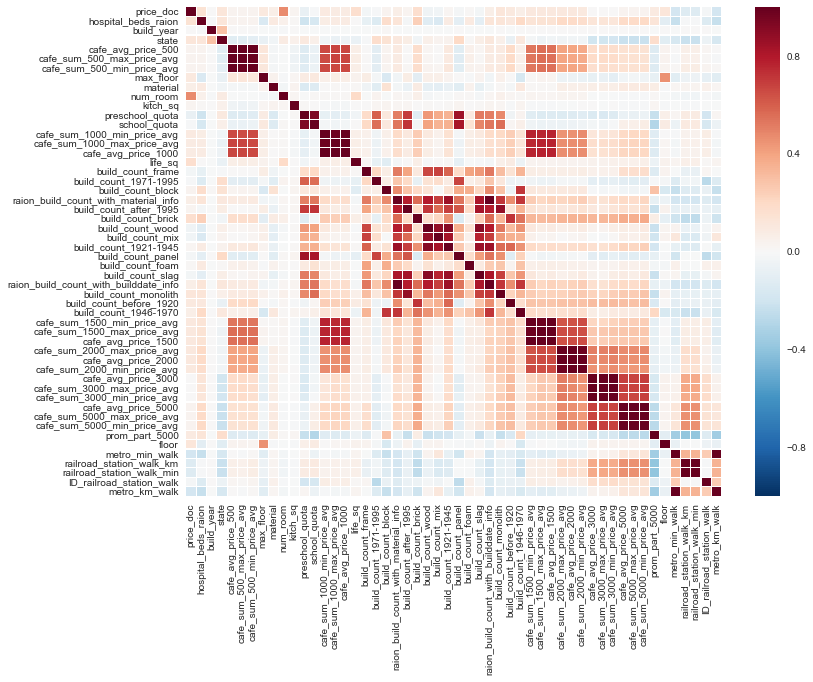

In [137]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2,linewidths=.1)

In [138]:
price_null2 = price_null.dropna()

In [139]:
price_null2.corr()

,price_doc,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
price_doc,1.000000,0.068864,0.000537,0.043201,0.084353,0.081715,0.087712,0.219462,0.079882,0.478370,...,0.245361,0.242629,0.249347,-0.103895,0.172476,-0.084502,0.020844,0.020844,0.113076,-0.084502
hospital_beds_raion,0.068864,1.000000,-0.012463,-0.007042,0.041361,0.041802,0.040377,-0.100492,0.046138,0.027490,...,0.123055,0.123451,0.122335,0.074735,-0.067432,-0.112521,-0.109418,-0.109418,-0.079020,-0.112521
build_year,0.000537,-0.012463,1.000000,0.498100,0.002342,0.002284,0.002411,0.000956,-0.008991,-0.014399,...,0.001960,0.001931,0.002005,-0.007317,0.003762,-0.005201,0.013276,0.013276,0.002180,-0.005201
state,0.043201,-0.007042,0.498100,1.000000,-0.009178,-0.010600,-0.006950,0.000469,-0.057490,0.050198,...,-0.060957,-0.061289,-0.060389,0.004632,-0.009736,0.009110,0.036873,0.036873,0.074220,0.009110
cafe_avg_price_500,0.084353,0.041361,0.002342,-0.009178,1.000000,0.998002,0.995394,0.030054,0.056668,0.030739,...,0.228608,0.226950,0.230951,-0.030100,0.023615,0.025938,-0.058295,-0.058295,0.085909,0.025938
cafe_sum_500_max_price_avg,0.081715,0.041802,0.002284,-0.010600,0.998002,1.000000,0.987348,0.029316,0.059447,0.027928,...,0.226314,0.224795,0.228443,-0.024799,0.023882,0.025915,-0.062292,-0.062292,0.083496,0.025915
cafe_sum_500_min_price_avg,0.087712,0.040377,0.002411,-0.006950,0.995394,0.987348,1.000000,0.030944,0.052018,0.034769,...,0.230343,0.228486,0.232992,-0.037912,0.023029,0.025776,-0.051786,-0.051786,0.088913,0.025776
max_floor,0.219462,-0.100492,0.000956,0.000469,0.030054,0.029316,0.030944,1.000000,0.105891,-0.003007,...,0.029702,0.029165,0.030502,-0.062770,0.596279,0.038471,0.083152,0.083152,-0.062215,0.038471
material,0.079882,0.046138,-0.008991,-0.057490,0.056668,0.059447,0.052018,0.105891,1.000000,-0.045673,...,0.062350,0.062216,0.062500,0.047720,0.039001,0.001686,-0.056204,-0.056204,0.057406,0.001686
num_room,0.478370,0.027490,-0.014399,0.050198,0.030739,0.027928,0.034769,-0.003007,-0.045673,1.000000,...,0.072025,0.070298,0.074619,-0.082692,-0.006258,-0.019544,0.037214,0.037214,0.047120,-0.019544


Correlation matrix heatmap without missing values

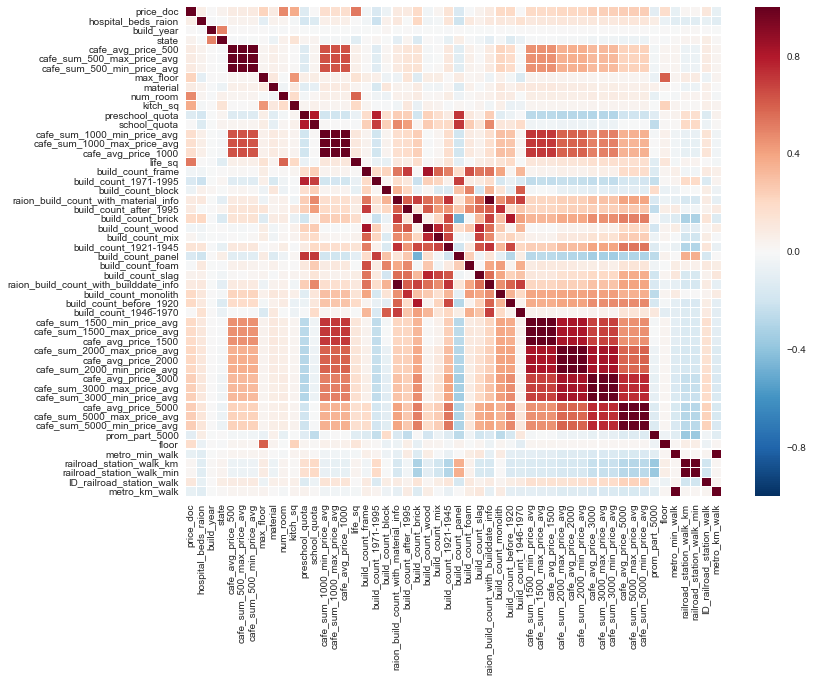

In [140]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(price_null2.corr(),linewidths=.1)

In [141]:
price_null2

,price_doc,hospital_beds_raion,build_year,state,cafe_avg_price_500,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,max_floor,material,num_room,...,cafe_avg_price_5000,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,prom_part_5000,floor,metro_min_walk,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,metro_km_walk
8056,2750000,4702.0,1907.0,3.0,1291.46,1597.56,985.37,5.0,2.0,1.0,...,1200.94,1493.45,908.42,4.35,2.0,6.990281,2.447469,29.369625,50.0,0.582523
8154,7100000,30.0,1970.0,3.0,750.00,1000.00,500.00,9.0,1.0,2.0,...,1020.69,1258.62,782.76,8.05,6.0,9.928954,3.852724,46.232692,47.0,0.827413
8287,11700000,1020.0,1957.0,2.0,728.57,928.57,528.57,5.0,2.0,3.0,...,1190.29,1481.99,898.60,14.54,3.0,10.135706,3.130615,37.567381,83.0,0.844642
8387,10400000,1970.0,1987.0,2.0,1333.33,1666.67,1000.00,16.0,5.0,2.0,...,1200.82,1495.88,905.76,13.19,5.0,6.389754,2.777814,33.333766,81.0,0.532479
8391,6200000,176.0,1962.0,3.0,2000.00,2500.00,1500.00,9.0,5.0,1.0,...,1288.93,1600.89,976.96,6.58,5.0,26.799990,4.788364,57.460372,50.0,2.233332
8410,5950000,2729.0,1960.0,2.0,750.00,1000.00,500.00,5.0,2.0,2.0,...,939.46,1179.75,699.17,12.25,1.0,12.525455,1.716648,20.599775,18.0,1.043788
8423,5900000,1130.0,1969.0,3.0,1000.00,1250.00,750.00,9.0,2.0,2.0,...,998.64,1250.00,747.27,17.05,9.0,40.816698,2.288152,27.457825,52.0,3.401391
8427,2000000,350.0,1972.0,3.0,400.00,500.00,300.00,9.0,1.0,2.0,...,928.46,1163.46,693.46,5.24,2.0,18.312411,9.351515,112.218178,33.0,1.526034
8452,4500000,100.0,1965.0,2.0,621.43,785.71,457.14,9.0,2.0,2.0,...,1013.68,1266.89,760.47,13.08,4.0,12.319597,1.426170,17.114035,40.0,1.026633
8470,4569600,75.0,2010.0,3.0,1250.00,1500.00,1000.00,17.0,1.0,2.0,...,991.83,1243.77,739.89,16.18,7.0,10.424612,0.873518,10.482214,72.0,0.868718


Relationship between price and year of construction

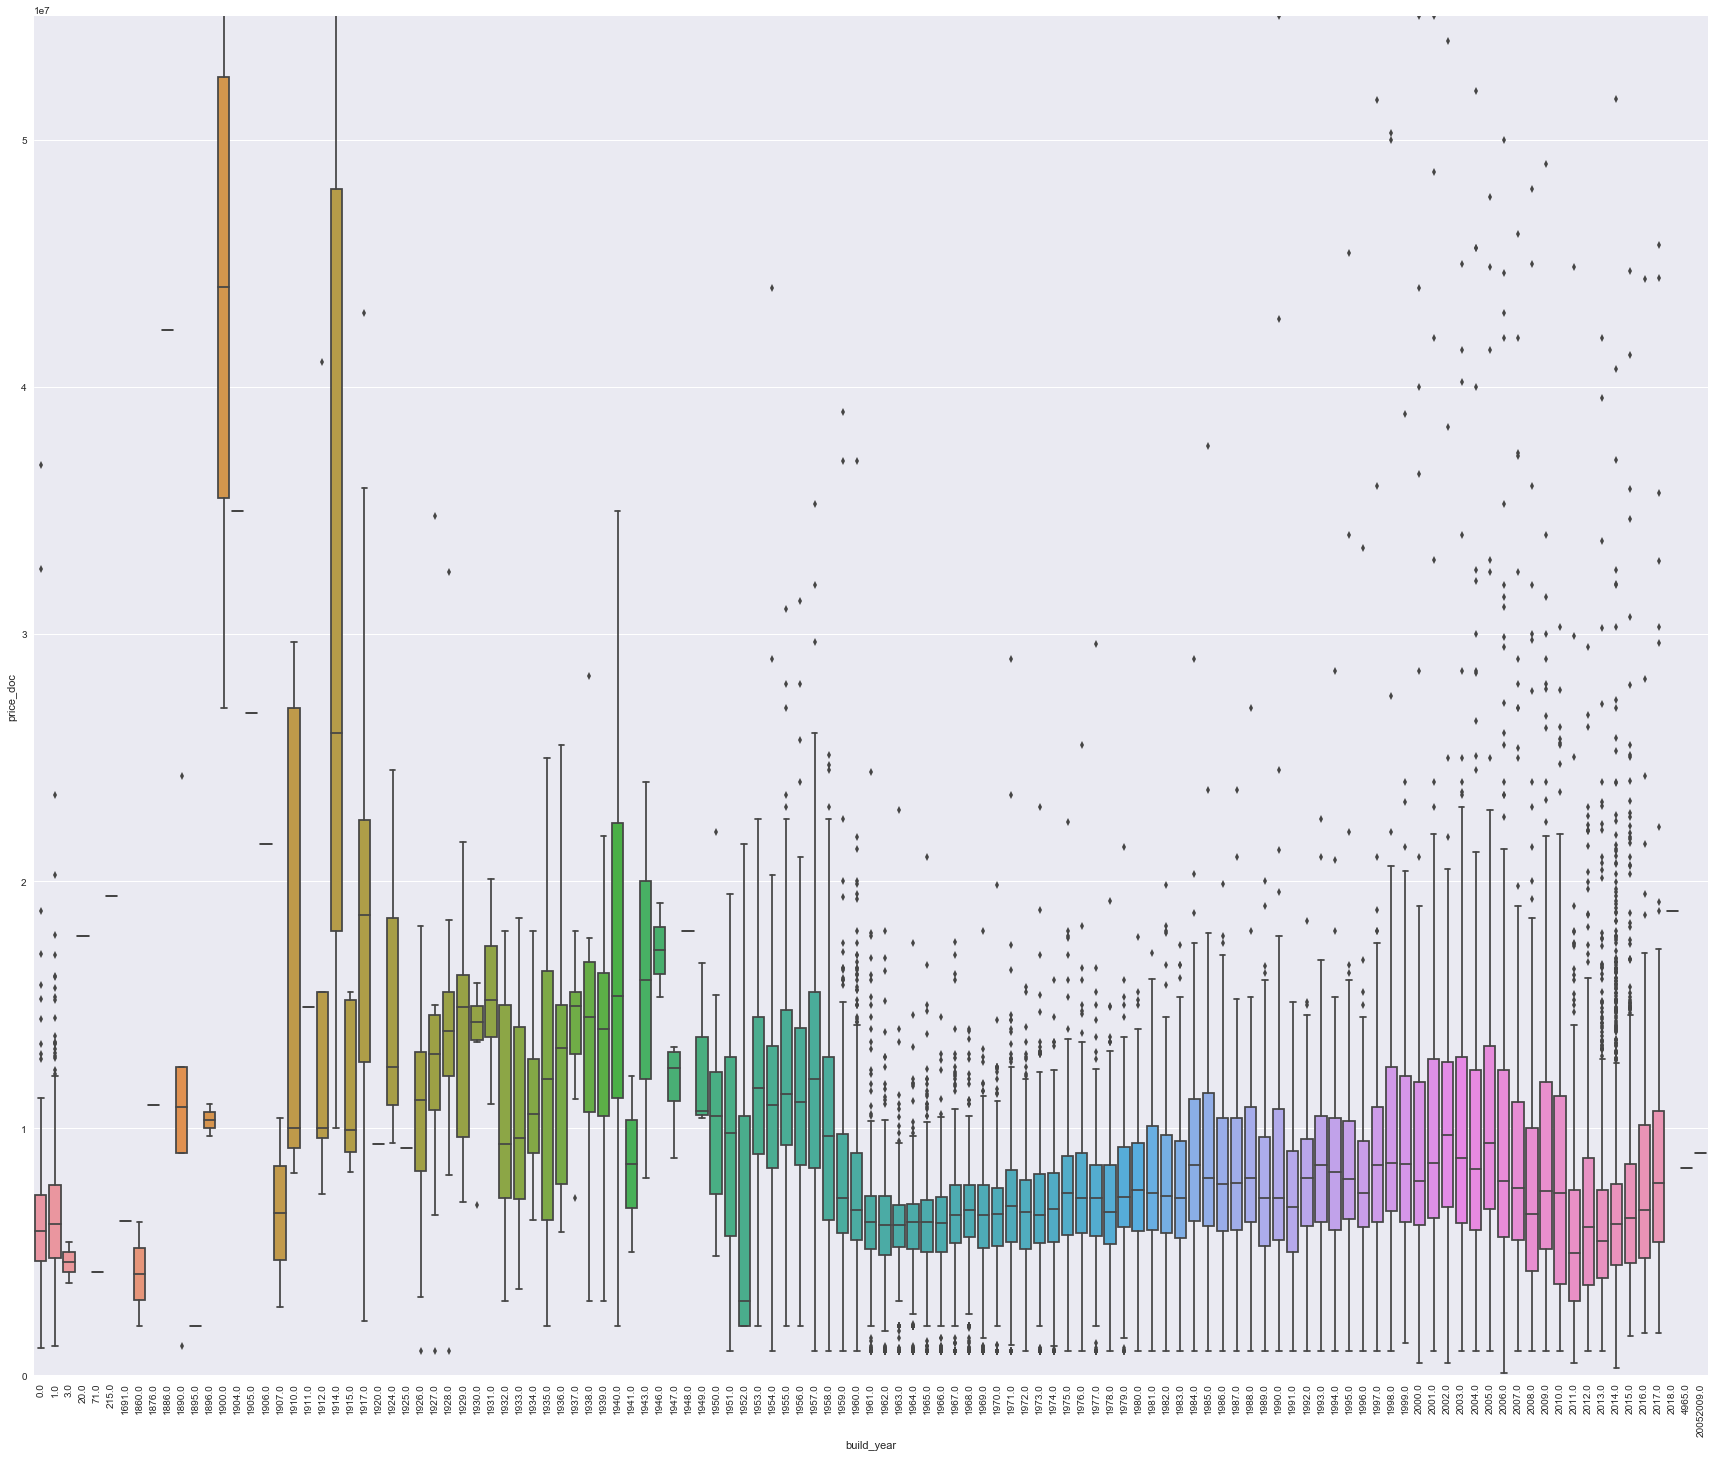

In [162]:
var = 'build_year'
data = pd.concat([price_null['price_doc'], price_null[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 25))
fig = sns.boxplot(x=var, y="price_doc", data=data)
fig.axis(ymin=0, ymax=55000000);
plt.xticks(rotation=90);

# Quick explanation and background
Let's leave the buildings from the 19th century to historians and focus on a closer time period. Visible volatility in prices for apartments built before 1950s can be explained by the fact that standardized housing projects were virtually non-existent during that time. In other words, every apartment building was unique to a certain extent. At the same time, buildings from that era are known for their sturdy design, spacious apartments and good location within the city (since the boundary of Moscow was much closer to the city center in that time). 

![alt tex](Stalinka.jpg "Stalinka")

Emergence of the concept of prefabricated apartment buildings in mid-1950s and its implementation in 1960s explain the lower price for apartments in the buildings constructed in this time.

Early buildings constructed in accordance with this concept from early 1960s to mid 1970s (the so-called Khrushchyovki) are considered non-desirable by a lot of people. Especially if compared with other series of building.   

![alt text](Khrush.jpg "Title")

Later series of prefabricated buildings enjoyed improved quality of construction materials, better communications and less cramped apartments, which explains a slight rise in prices for the apartments built in mid 1970s and after.

![alt text](Novostryka.jpg "Title")